In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skab-anomaly-detection/SKAB-master/LICENSE
/kaggle/input/skab-anomaly-detection/SKAB-master/.gitignore
/kaggle/input/skab-anomaly-detection/SKAB-master/README.md
/kaggle/input/skab-anomaly-detection/SKAB-master/utils/t2.py
/kaggle/input/skab-anomaly-detection/SKAB-master/utils/__init__.py
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/contributing.md
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/pictures/skab.png
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/pictures/testbed.png
/kaggle/input/skab-anomaly-detection/SKAB-master/docs/pictures/nab-metric.jpg
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/hotelling_q.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/mscred.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/isolation_forest.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/VAE.ipynb
/kaggle/input/skab-anomaly-detection/SKAB-master/notebooks/LSTM-AE.ipynb
/kaggle/input/skab-anomaly-d

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

* ###  Data Summary

In [3]:
#Path of data files
all_files =[]
for root, dirs, files in os.walk('/kaggle/input/skab-anomaly-detection/SKAB-master/data/'):
    for file in files:
        if file.endswith('.csv'):
            all_files.append(os.path.join(root,file))

#Data with outliers included         
list_of_df = [pd.read_csv(file,
                            sep = ';',
                            index_col = 'datetime',
                            ) for file in all_files if 'anomaly-free' not in file]

#Anomaly free data
anomaly_free_df = pd.read_csv([file for file in all_files if 'anomaly-free' in file][0],
                             sep = ';',
                             index_col = 'datetime')



In [4]:
print('이상치 포함된 DataFrame {}개'.format(len(list_of_df)))
for i in range(len(list_of_df)) : print(list_of_df[i].columns[0], list_of_df[i].shape)
print('Number of change points :',sum([len(df[df.changepoint == 1.0])for df in list_of_df]) )
print('Number of outliers :',sum([len(df[df.anomaly == 1.0])for df in list_of_df]) )
print('\n이상치 없는 데이터')
print(anomaly_free_df)

df = list_of_df[1] #두번째 데이터로 실험진행
display(df)

이상치 포함된 DataFrame 34개
Accelerometer1RMS (1063, 10)
Accelerometer1RMS (995, 10)
Accelerometer1RMS (1129, 10)
Accelerometer1RMS (1125, 10)
Accelerometer1RMS (745, 10)
Accelerometer1RMS (1190, 10)
Accelerometer1RMS (1137, 10)
Accelerometer1RMS (1155, 10)
Accelerometer1RMS (780, 10)
Accelerometer1RMS (923, 10)
Accelerometer1RMS (905, 10)
Accelerometer1RMS (1191, 10)
Accelerometer1RMS (1147, 10)
Accelerometer1RMS (1048, 10)
Accelerometer1RMS (1144, 10)
Accelerometer1RMS (1090, 10)
Accelerometer1RMS (1147, 10)
Accelerometer1RMS (1327, 10)
Accelerometer1RMS (1145, 10)
Accelerometer1RMS (1141, 10)
Accelerometer1RMS (1148, 10)
Accelerometer1RMS (1154, 10)
Accelerometer1RMS (1075, 10)
Accelerometer1RMS (1140, 10)
Accelerometer1RMS (1139, 10)
Accelerometer1RMS (1095, 10)
Accelerometer1RMS (1144, 10)
Accelerometer1RMS (1140, 10)
Accelerometer1RMS (1148, 10)
Accelerometer1RMS (1094, 10)
Accelerometer1RMS (1147, 10)
Accelerometer1RMS (1150, 10)
Accelerometer1RMS (1154, 10)
Accelerometer1RMS (1146, 1

,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-09 16:56:31,0.027495,0.039593,0.939237,0.054711,69.1741,24.1655,238.008,32.0000,0.0,0.0
2020-03-09 16:56:32,0.027394,0.040137,1.235540,0.054711,69.0063,24.1664,229.409,32.0000,0.0,0.0
2020-03-09 16:56:33,0.027292,0.040152,1.331430,0.054711,69.0291,24.1567,241.450,32.0000,0.0,0.0
2020-03-09 16:56:34,0.027325,0.038464,1.256480,-0.273216,68.9928,24.1582,250.288,32.0431,0.0,0.0
2020-03-09 16:56:35,0.027303,0.036969,1.355950,0.054711,68.9590,24.1562,240.265,32.9581,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-09 17:14:04,0.026853,0.038926,0.740614,0.054711,69.6371,24.1045,237.276,32.0451,0.0,0.0
2020-03-09 17:14:05,0.027067,0.038430,0.988875,0.054711,69.6731,24.1046,230.729,32.9562,0.0,0.0
2020-03-09 17:14:07,0.027582,0.038836,0.588439,0.054711,69.6959,24.1020,233.443,32.0000,0.0,0.0


### 센서값 시각화

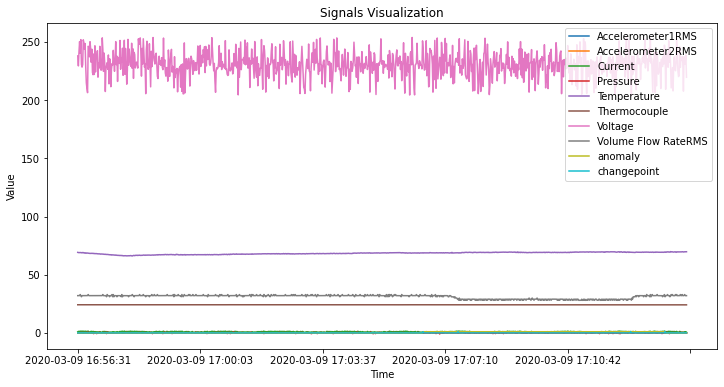

In [5]:
#시각화
df.plot(figsize = (12,6))
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Signals Visualization')
plt.show()

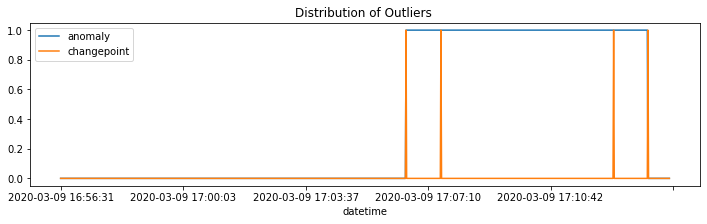

In [6]:
#데이터 분포 확인
df['anomaly'].plot(figsize = (12,3))
df['changepoint'].plot()
plt.legend()
plt.title('Distribution of Outliers ')
plt.show()


* ### Model Pipeline and Preprocessing


In [7]:
# Random Seed
def Random(seed_value):
    import os
    os.environ['PYTHONHASHSEED'] = str(seed_value)
    import random
    random.seed(seed_value)
    np.random.seed(seed_value)
    import tensorflow as tf
    tf.random.set_seed(seed_value)

In [8]:
#Convolutional AutoEncoder
def convae(data):

    model = keras.Sequential([ 
        
        layers.Input(shape = (data.shape[1], data.shape[2])),
        layers.Conv1D(filters = 32, kernel_size = 7, padding = 'same', strides = 2, activation = 'relu' ),
        layers.Conv1D(filters = 16, kernel_size = 7, padding = 'same', strides = 2, activation = 'relu' ),
        layers.Conv1DTranspose(filters = 16, kernel_size = 7, padding = 'same', strides = 2, activation = 'relu' ),
        layers.Conv1DTranspose(filters = 32, kernel_size = 7, padding = 'same', strides = 2, activation = 'relu' ),
        layers.Conv1DTranspose(filters = 8, kernel_size = 7, padding = 'same'),  # shape 일치시키기 위한 layer(오토인코더 구조) 
    
    ])

    model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = 'mse')
    model.summary()

    # Training
    history = model.fit(        
        data,
        data, # 오토인코더(비지도학습) input -> input'
        epochs = 100,
        batch_size = 32,
        verbose = 0,

        # early stopping 자동 학습 중단. patience 5번 loss 상승없으면 중단
        callbacks = [
            keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0)
        ]

    )
    return history, model

In [9]:
#Preprocessing
X_train = df[:400].drop(columns = ['anomaly','changepoint'], axis = 1) ##0~400번까지 모두 정상데이터이므로 학습데이터로 선정
StSc = StandardScaler()
X_train_scale = StSc.fit(X_train)   ## Standardization(표준) : train data의 평균, 분산분포를 저장. 추후에 test data에도 똑같이 적용필요
X_train_scale = StSc.transform(X_train)


### Sequential data &rarr; sliding window(size=60) 

In [10]:
def create_sequences(data, time_steps = 60):
    out = []
    for i in range(len(data) - time_steps + 1):
        out.append(data[i : (i + time_steps)])
    return np.stack(out)

X_train_seq = create_sequences(X_train_scale,60) #400의 정상데이터를 60개의 묶음으로 1씩 shift 하며 묶음 -> 341개의 sequential data
X_train_seq.shape 

(341, 60, 8)

In [11]:
history, model = convae(X_train_seq)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            1824      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 30, 16)            1808      
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 60, 32)            3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 60, 8)             1800      
Total params: 12,648
Trainable params: 12,648
Non-trainable params: 0
_________________________________________________________________


* ### Anomaly Scoring & Result

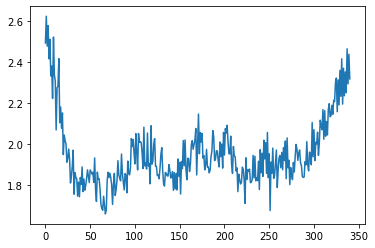

In [12]:
residuals = pd.Series(np.sum(np.mean(np.abs(X_train_seq - model.predict(X_train_seq)), axis = 1), axis = 1)) # input data와 reconstructed input의 차이값 평균의 합
ucl = residuals.quantile(0.999) # 차이값의 전체 분포에서 상위 0.01% 지점을 upper control limit으로 지정
plt.plot(residuals) ## value gap between the original input and the reconstructed input (anomaly-free data)
plt.show()

Text(0.5, 1.0, 'Actual Label')

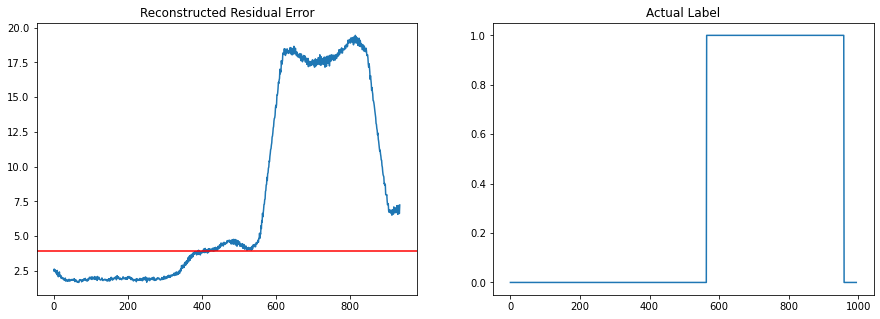

In [13]:
X_test_sc = StSc.transform(df.drop(columns = ['anomaly','changepoint']))  #400번째 이후의 이상치 데이터 모두 포함하여 test data 지정
X_test_seq = create_sequences(X_test_sc)
test_residuals = pd.Series(np.sum(np.mean(np.abs(X_test_seq - model.predict(X_test_seq)), axis = 1), axis = 1))
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(test_residuals)
plt.axhline(y = ucl * 1.5 , xmin = 0, xmax=len(X_train_seq),color='red')  # upper control limit 의 1.5배를 Threshold 로 설정
plt.title('Reconstructed Residual Error')
plt.subplot(1,2,2)
plt.plot(df['anomaly'].values)
plt.title('Actual Label')

In [14]:
# 비교를 위해 label값을 time 단위로 변경
N_STEPS = 60
anomalous_data = test_residuals > ucl * 1.5

anomalous_data_indices = []
for data_idx in range(N_STEPS - 1, len(X_test_seq) - N_STEPS + 1):
    if np.all(anomalous_data[data_idx - N_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)
    

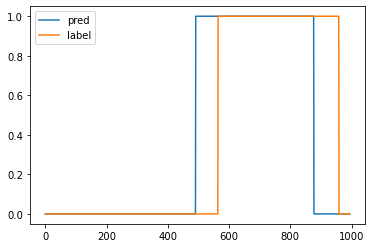

In [15]:
prediction = pd.Series(data = 0, index = df.index)
prediction.iloc[anomalous_data_indices] = 1

plt.plot(prediction.values, label = 'pred')
plt.plot(df['anomaly'].values, label = 'label')
plt.legend()
plt.show()